<br><br><center><h1 style="font-size:4em;color:#1B1B1B">Red Wine Quality Prediction</h1></center>
<br>
<table>
    <col width="550">
    <col width="450">
    <tr>
        <td><img src="http://yesofcorsa.com/wp-content/uploads/2015/08/4660_wine.jpg" align="middle" style="width:550px;height:360px;"/></td>
<td>
        <br>
        <b>DESCRIPTION</b>:
        <br>
        The data set that I will be using in this project is a public open dataset from the famous site <a href="https://www.kaggle.com">Kaggle</a>. This <a href="https://www.kaggle.com/piyushgoyal443/red-wine-dataset">Red Wine Dataset</a> relates to the red variant of the Portuguese "Vinho Verde" wine.
                <br>
                <br>
                <br>
                <b>RELEVANT INFORMATION</b>:
                <br>
                The dataset contains <b>12 columns</b> which include the physicochemical results of 11 different tests (example: fixed acidity) and 1 quality evaluation, which is based on the average value of at least 3 opinions provided by wine experts. Each expert was given the task to grade the wine quality between 3 (extremely bad) and 8 (excellent).
                <br>
                Unfortuantely, due to privacy and logistic reasons, there is no available data about grape types, wine brand or wine selling price.
                <br>
                <br>
                <br>
                <b>RELEVANT PUBLICATION</b>
                <br>
                P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
                In Decision Support Systems, Elsevier, 47(4):547-553, ISSN: 0167-9236.2009.
                <br>
                For more details, consult the reference [Cortez et al., 2009].
</table>
 </td>

## Summary
1. [Dataset Overview](#1.-Dataset-Overview)
2. [Research Goals](#2.-Research-Goals)
3. [Import Libraries - Data Ingestion](#3.-Import-Libraries---Data-Ingestion)
4. [Data Exploration](#4.-Data-Exploration)
5. [Data Preparation](#5.-Data-Preparation)
6. [Model 1: Decision Tree](#6.-Model-1:-Decision-Tree)
7. [Model 2: K-Nearest Neighbours](#7.-Model-2:-K-Nearest-Neighbours)
8. [Conclusions](#8.-Conclusions)

## 1. Dataset Overview
This dataset includes test analysis that are necessary to certify wines. The dataset contains **11 attributes** (input variables) and **1 output attribute** (wine quality):

**Input variables** (based on physicochemical tests):
- **Fixed Acidity** (tartaric acid, g/dm^3): Acids, together with tannin, alcohol, and sweetness are the 4 fundamental traits in wine. `These acids affect how acidic a wine tastes`. The most prevalent acids in wine are tartaric, malic, and citric acid. Fixed acidity is a measure of wine acidity andf the term `fixed` refers to the fact these acids are nonvolatile (they do not evaporate readily).
- **Volatile Acidity** (acetic acid, g/dm^3): The amount of acetic acid found in wine. It is important because if it is too high, it can lead to an unpleasant, `vinegar taste`.
- **Citric Acid** (g/dm^3): In small quantities, it can add `freshness` and `flavour` to wines.
- **Residual Sugar** (g/dm^3): Grapes contain fruit sugars (fructose and glucose) and the residual sugar is what remains after grapes have gone through the winemaking process. Wines containing less than 1 gram/litre of residual sugars are `rare`, and wines containing more than 45 grams/litre of it are considered `sweet`.
- **Chlorides** (sodium chloride, g/dm^3): The amount of `salt` in wine.
- **Free Sulfur Dioxide** (mg/dm^3): It is used to `prevent microbial growth` and the `oxidation` of wine. 
- **Total Sulfur Dioxide** (mg/dm^3): SO2 is `used as a preservative` because of its anti-oxidative and anti-microbial properties in wine, but also as a `cleaning agent` for barrels and winery facilities. Not detectable in low concentrations, but when higher than 50 ppm, SO2 becomes evident in the nose and taste of wine. 
- **Density** (g/cm^3): In wine, density is affected by alcohol, sugar, glycerol, and other dissolved solids.
- **Ph**:  It describes how `acidic` or `basic` a wine is on a scale from 0 (very acidic) to 14 (very basic). Most wines range from 2.5 to about 4.5 pH, and 7 is neutral. 
- **Sulphates** (potassium sulphate, g/dm3): An additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an `antimicrobial` and `antioxidant`.
- **Alcohol** (percentage by volume): The percent of alcohol content in wine.

**Output variable** (based on sensory data):
- **Quality**: The average score given by at least 3 wine experts, scoring between 0 and 10, from very bad to excellent.

## 2. Research Goals
After exploring the website list provided by our instructors, this dataset got my attention because I worked as a restaurant manager for various years in Sydney (Australia). Selecting wine for my venues was one of my duties, as customers desired to be impressed with beautiful wine options matching their food selections. 

This dataset gives me the chance to create a model to predict if a wine is a good or a bad choice based on its physicochemical values and quality evaluations. Is it possible to do it? Is there any correlation between pairs of variables? Is quality associated with any specific attributes? 

<blockquote>

Can I create a model to predict wine quality based on its physicochemical values and be able to purchase wine online with confidence, without having to read any wine reviews?

</blockquote>

The first steps in my process to deal with this **supervised learning classification problem** are importing/digesting data and explore the dataset to:
- Gain a better understanding of its specific characteristics.
- Identify correlations to explore the dependencies between different variables in the data.
- Identify outliers.   

## 3. Import Libraries - Data Ingestion

In [1]:
import numpy as np                                   # Linear algebra / calculations
import pandas as pd                                  # Data processing / DataFrames 
import os                                            # To check directory content

import matplotlib as mpl                             # Data Visualisation
import matplotlib.pyplot as plt                      # Data Visualisation
import seaborn as sns                                # Data Visualization
%matplotlib inline

from sklearn.model_selection import train_test_split # To split data into Test/Train
from sklearn.tree import DecisionTreeClassifier      # To create a Decision Tree Classifier
from sklearn.metrics import accuracy_score           # To test the model accuracy 
from sklearn.ensemble import ExtraTreesClassifier    # To calculate feature importance

from sklearn import preprocessing                    # To transform data
from sklearn.neighbors import KNeighborsClassifier   # To create a KNN Classifier

/Users/riccardobellio/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
display(os.getcwd(), os.listdir()) # Get working directory path and check if "Wine_Quality_Reds.csv" is in it 

'/Users/riccardobellio/Desktop/SAN DIEGO - EDX/9:10 - FINAL PROJECT'

['.DS_Store',
 'PROJECT.ipynb',
 'Wine_Quality_Reds.csv',
 'PROJECT.pdf',
 '.ipynb_checkpoints',
 'Final Project and Notebook.pdf',
 'Used',
 'Presentation PDF.pdf',
 'Extras']

In [4]:
data = pd.read_csv("/Users/riccardobellio/Desktop/SAN DIEGO - EDX/9:10 - FINAL PROJECT/Wine_Quality_Reds.csv") #Ingestion into Pd.DataFrame (.Csv file)

## 4. Data Exploration

In [5]:
display(data.info(), data.head()) # Display data info and the first 5 rows of my DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
Unnamed: 0              1599 non-null int64
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


None

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data["quality"].unique()  # Display quality unique values

array([5, 6, 7, 4, 8, 3])

The dataset includes 1599 entries and 13 columns:
- There are `no NULL values`: no need to process them.
- Column `"Unnamed: 0"` is unnecessary and will be `deleted`.
- Headers will be `capitalised` and `"." changed with " "` for clarity.
- The `"quality" column` is confusing: a quality ranging between 3 and 8 is odd. It will be `turned into a 0-5 range (0=very bad, 5=Excellent)`.

In [7]:
del data["Unnamed: 0"]   # Delete column "Unnamed: 0"

In [8]:
data.rename(columns={"fixed.acidity": "Fixed Acidity", "volatile.acidity": "Volatile Acidity", # Rename columns
                     "citric.acid": "Citric Acid", "residual.sugar": "Residual Sugar",
                     "chlorides": "Chlorides", "free.sulfur.dioxide":"Sulfur Dioxide (Free)",
                     "total.sulfur.dioxide":"Sulfur Dioxide (Total)", "density": "Density", "pH": "PH",
                     "sulphates": "Sulphates", "alcohol": "Alcohol", "quality": "Quality"}, inplace=True)

In [9]:
data["Quality"] = data["Quality"].map({3 : 0, 4 : 1, 5 : 2, 6 : 3, 7 : 4, 8 : 5})   # Change values
data["Quality"].unique()

array([2, 3, 4, 1, 5, 0])

In [10]:
data.head() # Final result

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Sulfur Dioxide (Free),Sulfur Dioxide (Total),Density,PH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


My next step is to use an approriate statistical method to look for `co-dependencies` and check if it is possible to reduce the quantity of our input variables in order ot reduce the computational cost of modeling and improve model performance.

The methods `describe()` and `corr()` are used to evaluate the relationship between input variables and target variable and a `correlation heatmap matrix` is employed to visualise these relationships. I will be looking for the input variables with the strongest relationship with the target variable. 

In [11]:
data.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Sulfur Dioxide (Free),Sulfur Dioxide (Total),Density,PH,Sulphates,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,2.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,2.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,3.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,3.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,5.000000


Some attributes show similar values for Mean and Median (50%). Data distribution will be visualised, starting with wine quality and then continuing with a summary of the other columns.

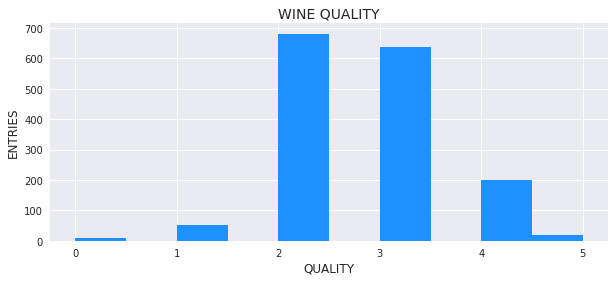

In [12]:
mpl.style.use('seaborn')                                                   # Style = Seaborn
data["Quality"].plot(kind="hist", figsize=(10,4), color="dodgerblue")      # Data, type of plot and size
plt.title('WINE QUALITY', size=14)                                         # Set title
plt.ylabel('ENTRIES', size=12)                                             # Set ylabel
plt.xlabel('QUALITY', size=12)                                             # Set xlabel
plt.show()

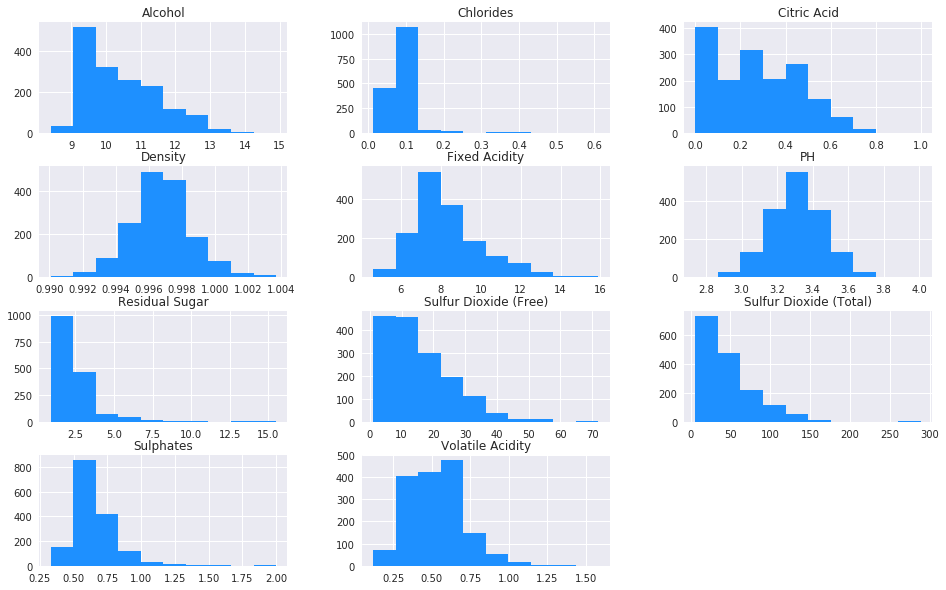

In [13]:
data[["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar", "Chlorides",
     "Sulfur Dioxide (Free)", "Sulfur Dioxide (Total)", "Density", "PH", "Sulphates",
     "Alcohol"]].hist(bins=10, figsize=(16,10), color="dodgerblue")
plt.show()

- The dataset mainly include average quality wines (score: 2 and 3), and very bad and excellent wines are scarce.
- Various attributes show a similar distribution and probably a co-dependency. Correlations will be checked numerically and visually.
- Data distribution shows the presence of Outliers that have to be investigated.

### Statistical Correlation

In [14]:
data.corr()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Sulfur Dioxide (Free),Sulfur Dioxide (Total),Density,PH,Sulphates,Alcohol,Quality
Fixed Acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Volatile Acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Citric Acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Residual Sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Sulfur Dioxide (Free),-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Sulfur Dioxide (Total),-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
PH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


A `Correlation Heat-map` will visualise this data more efficiently.

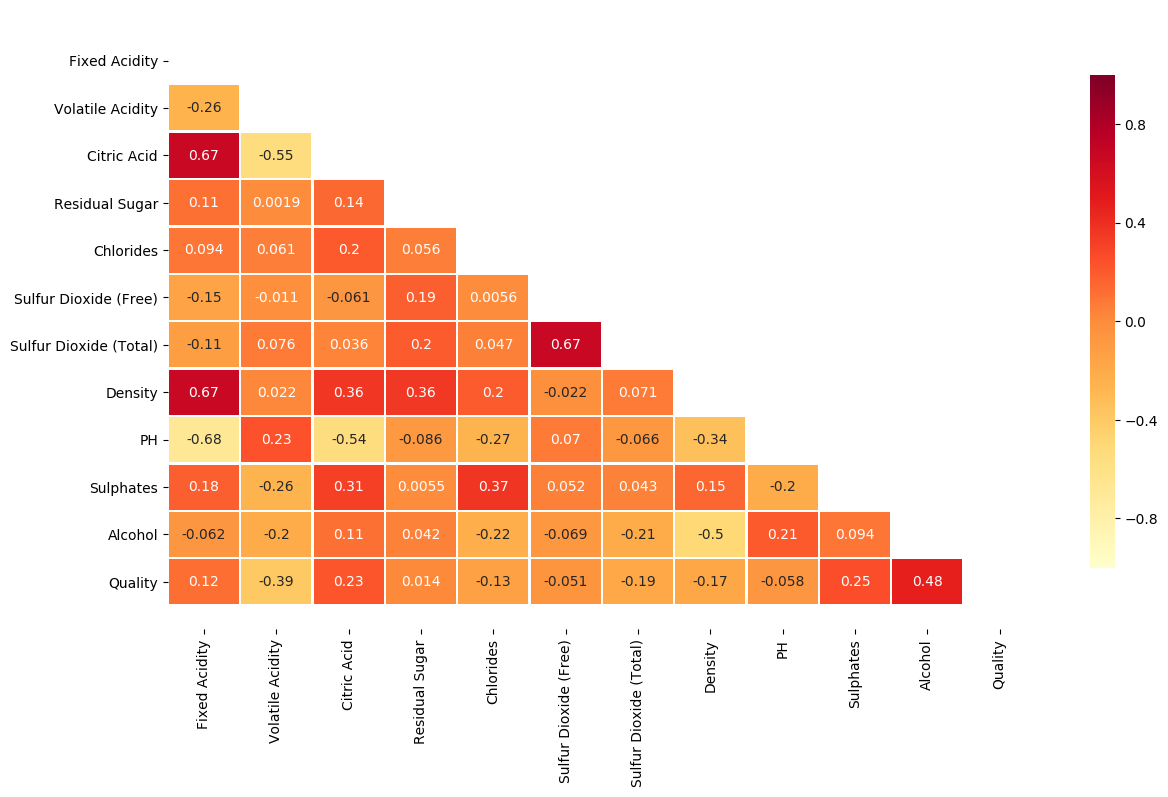

In [15]:

corr = data.corr()                            # Data

# A mask to only visualise the lower triangle of the plot

mask = np.zeros_like(corr, dtype=np.bool)     # All False values)

mask[np.triu_indices_from(mask)] = True       # Upper Triangle False values

mpl.style.use('default')                      # Default style

f, ax = plt.subplots(figsize=(14,8))          # Matplotlib figure set up

sns.heatmap(                                  # Seaborn, correlation heatmap with mask
    corr,                                     # Data
    mask=mask,                                # Mask
    cmap="YlOrRd",                            # Colors choice
    annot=True,                               # Include values
    vmax=1,                                   # Legend, maximum value
    vmin=-1,                                  # Legend, minimum value
    center=0,                                 # Legend, center value
    linewidths=1,                             # Line Width to divide cells
    cbar_kws={"shrink": .8}                   # Legend, shrink percentage
)

bottom, top = ax.get_ylim()                   # Recent version of Python messes up with seaborn

ax.set_ylim(bottom + 0.5, top - 0.5)          # Need to set the top/bottom of the heatmap to correctly visualie it  

plt.show()

The squares containing:
- A **positive value** show a **positive relationships** between features: if one feature increases, the other will do the same. The higher the value, the stronger the relationships and the darker the red colour.
- A **negative value** show an **inverse relationship** between features: if one feature increases, the other decreases. The lower the value, the stronger the negative relationship and the lighter the yellow colour.
- A value **close to zero** show almost **no co-dependency** between features.

The heat-map shows that:
- **Fixed Acidity** and **PH** show a negative correlation (-0.68): in fact fixed acidy levels increase ph levels. 
- **Fixed Acidity**, **Citric Acid** and **Density** show a positive correlation (both +0.67). 
- **Sulfur Dioxide (Free)** and **Sulfur Dioxide (Total)** show a positive correlation (+0.67).
- **Citric Acid** and **Volatile Acidity** show a negative correlation (-0.55).
- **Citric Acid** and **PH** show a negative correlation (-0.54).
- **Alcohol** and **Quality** show a relative positive correlation (+0.48).

We can visualise these correlations using scatterplots, and pay attention to the presence of `outliers`.

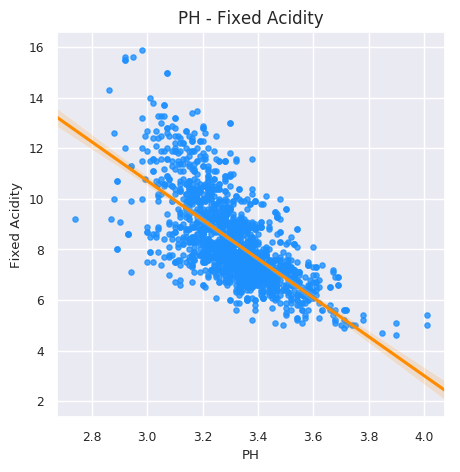

In [16]:

plt.figure(figsize=(5,5))                                         # Plot(Figure Size)

sns.set(font_scale=0.8)                                           # Set scale

sns.set_style("darkgrid")                                         # Set style

ax = sns.regplot(x="PH", y="Fixed Acidity",                       # Seaborn Regplot (values)
                 data=data,                                       # Dataset
                 scatter_kws={"color":"dodgerblue", 's':14},      # Dots, set color and size
                 line_kws={"color":"darkorange"})                 # Line, set color

ax.set_title("PH - Fixed Acidity", size=12)                     # Set title


plt.show()


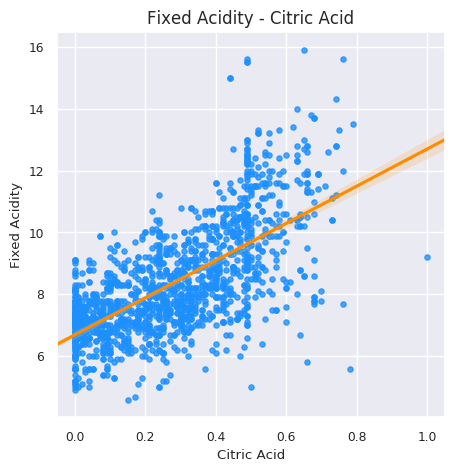

In [17]:
plt.figure(figsize=(5,5))    
sns.set(font_scale=0.8)                         
sns.set_style("darkgrid")                     
ax = sns.regplot(x="Citric Acid", y="Fixed Acidity", data = data, scatter_kws={"color": "dodgerblue", 's':14},
                 line_kws={"color":"darkorange"}) 
ax.set_title("Fixed Acidity - Citric Acid",size =12)
plt.show()

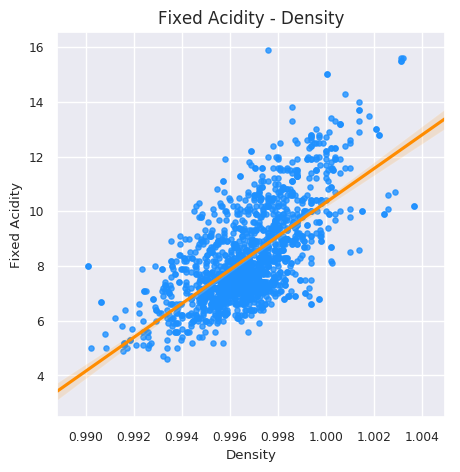

In [18]:
plt.figure(figsize=(5,5))                
sns.set(font_scale=0.8)                         
sns.set_style("darkgrid")                     
ax = sns.regplot(x="Density", y="Fixed Acidity", data = data, scatter_kws={"color": "dodgerblue", 's':14},
                 line_kws={"color": "darkorange"}) 
ax.set_title("Fixed Acidity - Density", size=12)
plt.show()

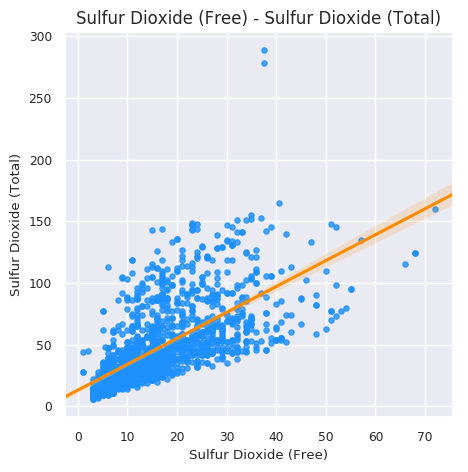

In [19]:
plt.figure(figsize=(5,5))                  
sns.set(font_scale=0.8)                         
sns.set_style("darkgrid")                     
ax = sns.regplot(x = "Sulfur Dioxide (Free)", y="Sulfur Dioxide (Total)", data = data, scatter_kws={"color": "dodgerblue", 's':14},
                 line_kws={"color": "darkorange"})
ax.set_title("Sulfur Dioxide (Free) - Sulfur Dioxide (Total)", size=12)
plt.show()

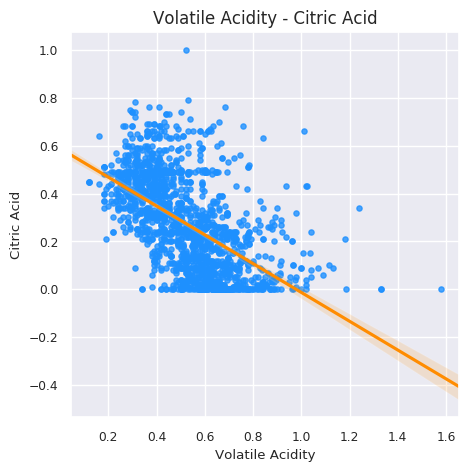

In [20]:
plt.figure(figsize=(5,5))                  
sns.set(font_scale=0.8)                         
sns.set_style("darkgrid")                     
ax = sns.regplot(x="Volatile Acidity", y="Citric Acid", data = data, scatter_kws={"color": "dodgerblue", 's':14},
                 line_kws={"color": "darkorange"}) 
ax.set_title("Volatile Acidity - Citric Acid", size=12)
plt.show()

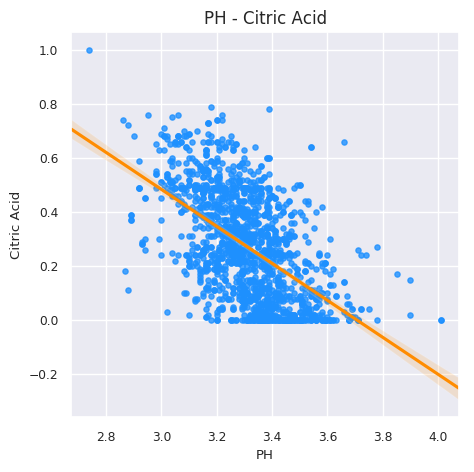

In [21]:
plt.figure(figsize=(5,5))                  
sns.set(font_scale=0.8)                         
sns.set_style("darkgrid")                     
ax = sns.regplot(x = "PH", y = "Citric Acid", data = data, scatter_kws={"color": "dodgerblue", 's':14},
                 line_kws={"color": "darkorange"}) 
ax.set_title("PH - Citric Acid", size=12)
plt.show()

The relationship bewteen `Alcohol` and `Quantity` can be better visualised using a `bar plot`: quality tend to increase in relation to an increase in alcohol content. 

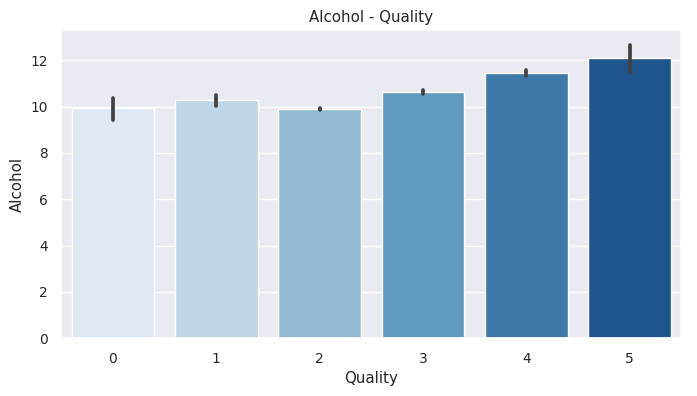

In [22]:
plt.figure(figsize=(8,4))                                              # Set figure size
sns.set(font_scale=0.9)                                                 # Set font size
sns.set_style("darkgrid")                                               # Set grid
ax = sns.barplot(x=data["Quality"], y=data["Alcohol"], palette="Blues") # Plot, data, colors
ax.set_title("Alcohol - Quality")                                       # Set title
plt.show()

The above scatterplots reveal the presence of outliers in our dataset. **What are we going to do with them?** Below I visualise a summary of all the variable correlations to show the presence of these outliers.

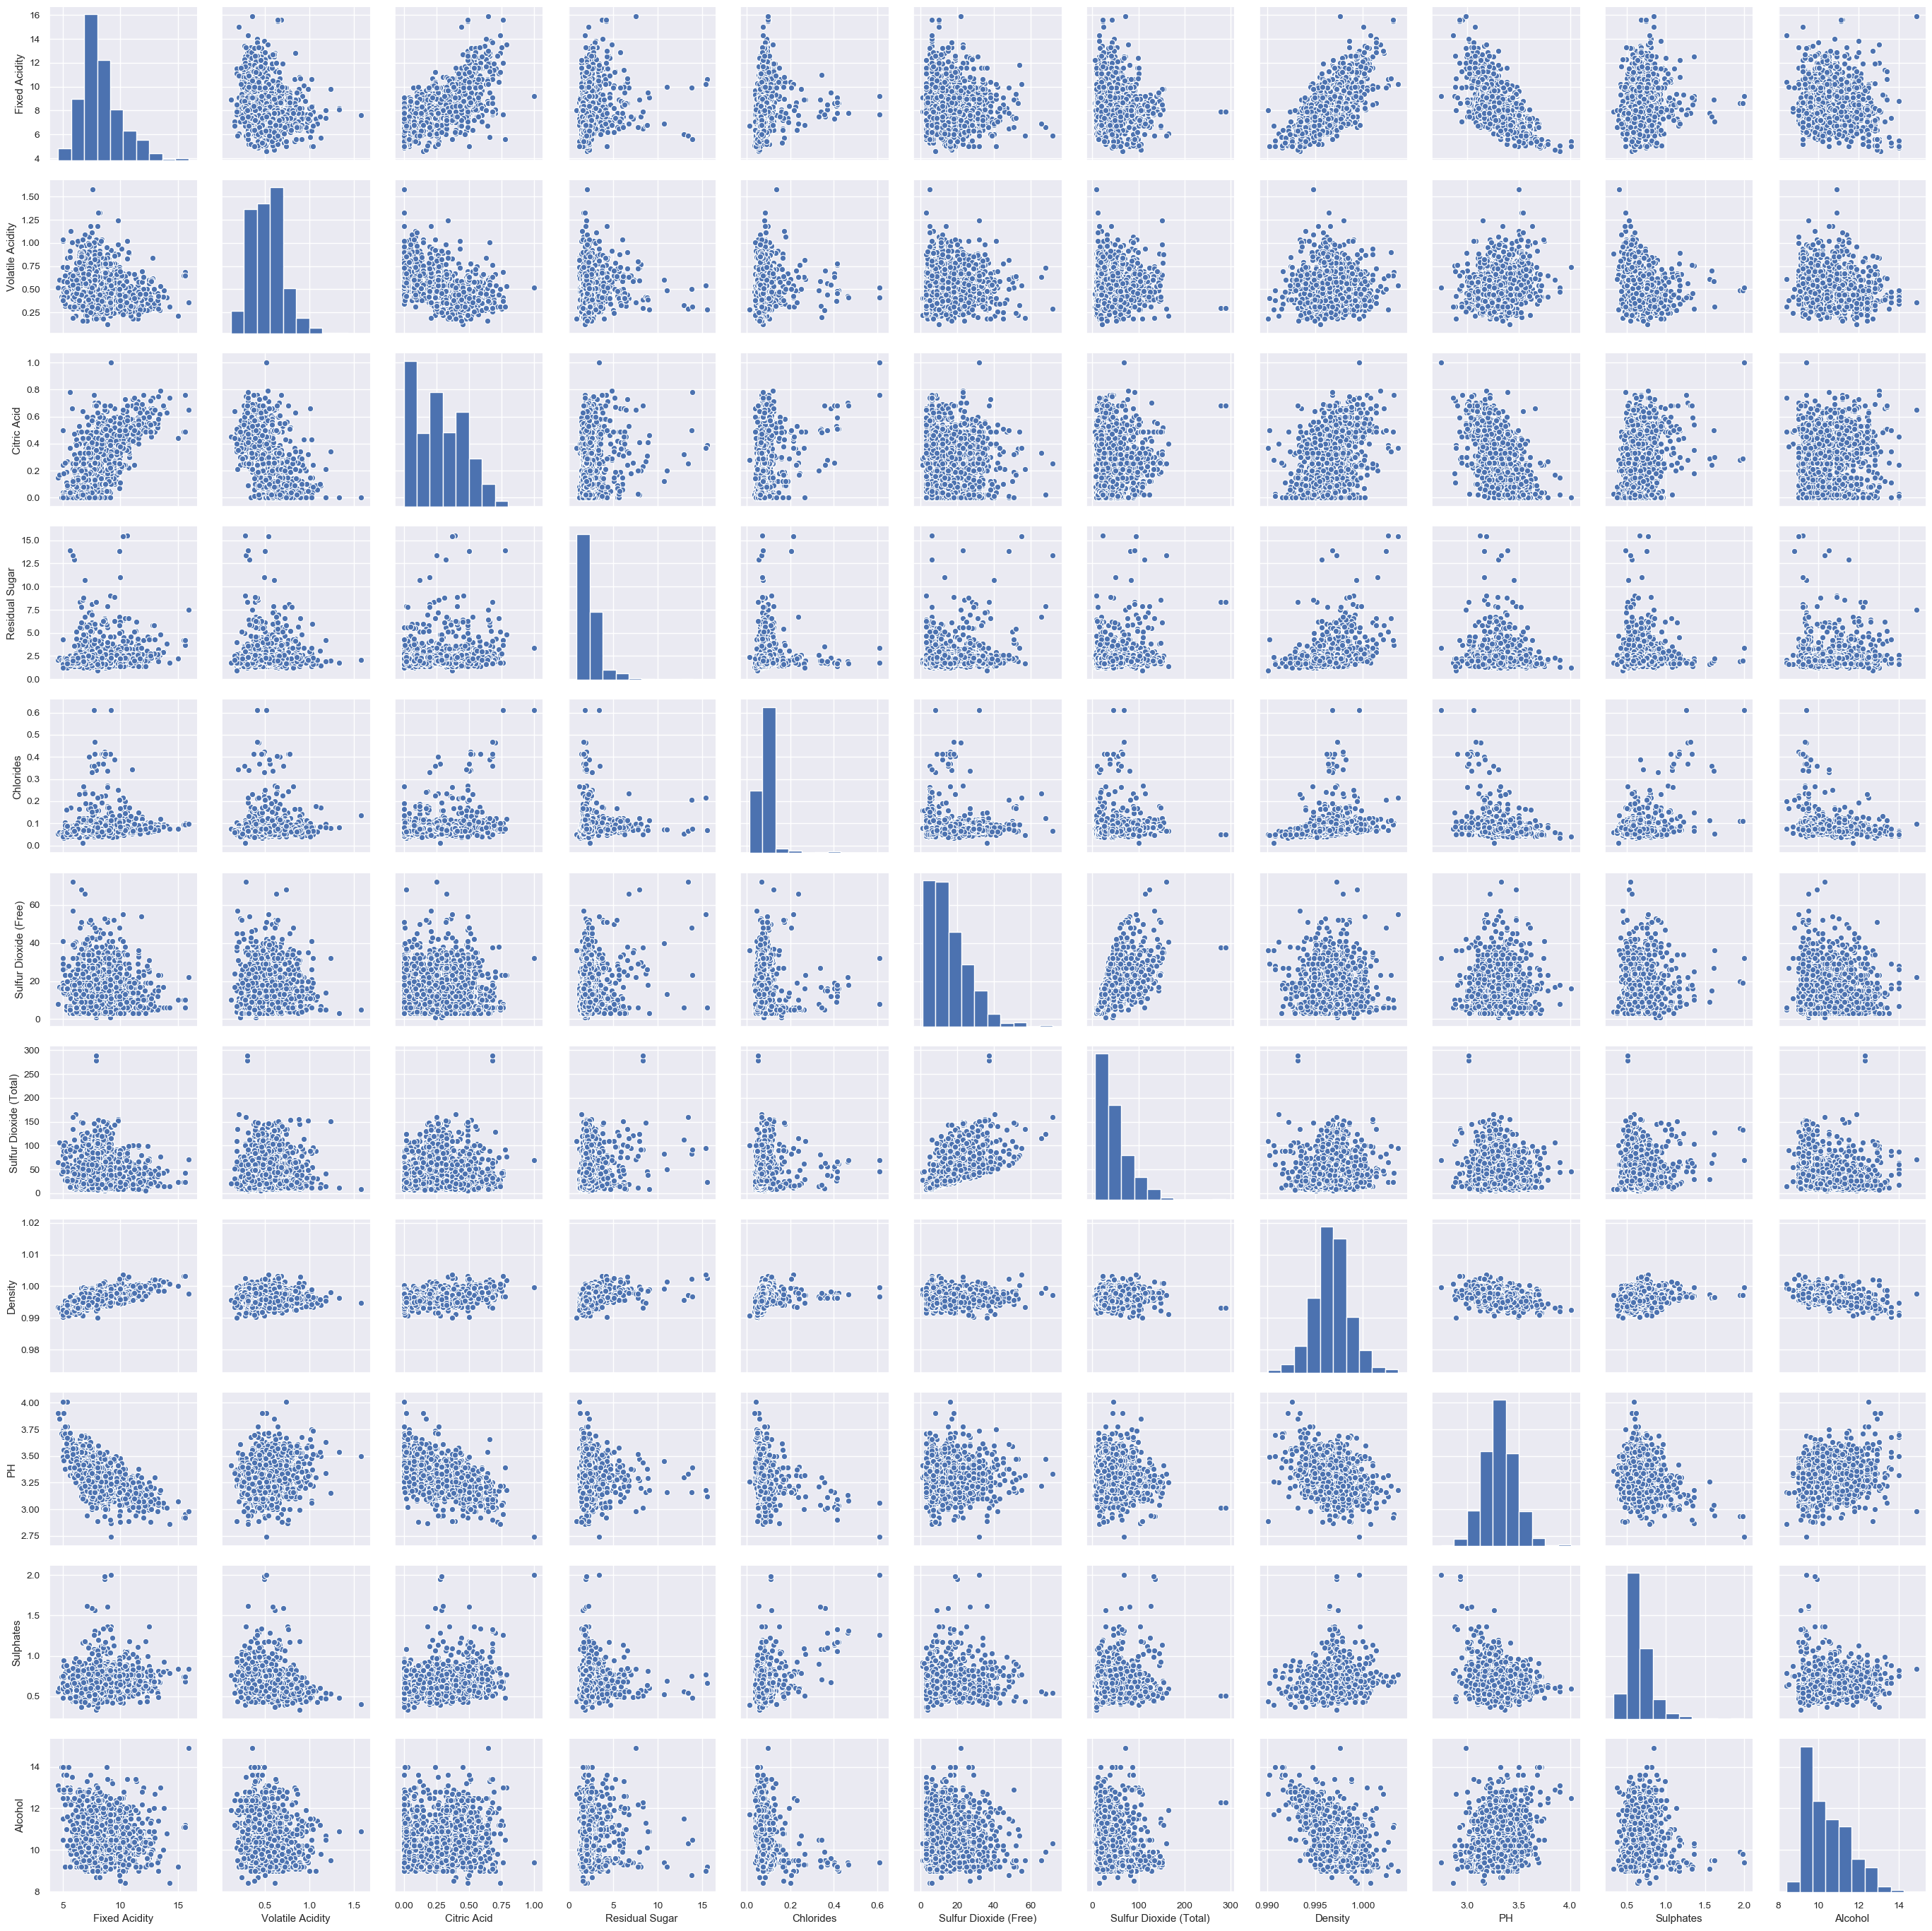

In [22]:
pair = data.drop("Quality", axis=1)
sns.pairplot(pair)

The importance of each feature in our dataset is tested using the `feature_importance_` property of the model `ExtraTreesClassifier`. As a result, we visualise a plot containing a score for each feature: the **higher the score, the more relevant is the feature towards our output variable**.

In [25]:
importance

Alcohol                   0.140141
Sulphates                 0.105729
Sulfur Dioxide (Total)    0.103538
Volatile Acidity          0.099586
Density                   0.087425
Citric Acid               0.084270
Residual Sugar            0.079575
Fixed Acidity             0.078845
Chlorides                 0.075938
Sulfur Dioxide (Free)     0.074133
PH                        0.070818
dtype: float64

In [26]:
X_sel.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Sulfur Dioxide (Free),Sulfur Dioxide (Total),Density,PH,Sulphates,Alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


/Users/riccardobellio/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


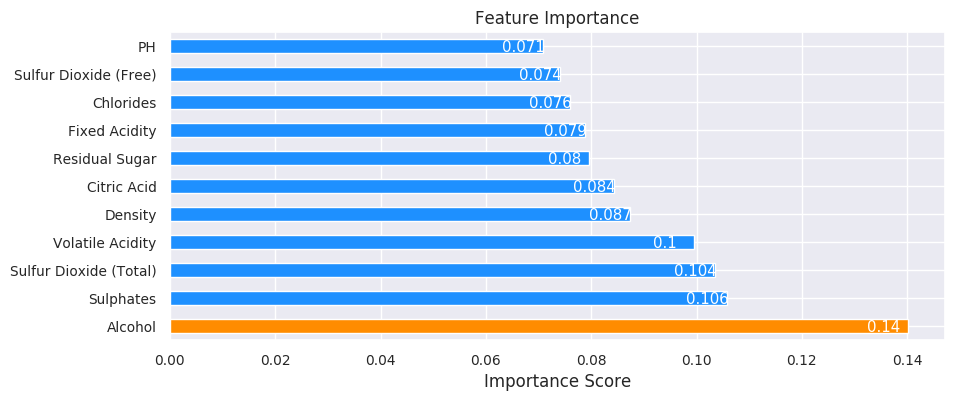

In [23]:
X_features = ["Fixed Acidity", "Volatile Acidity", "Citric Acid",         # Features to create X
              "Residual Sugar", "Chlorides", "Sulfur Dioxide (Free)",     
              "Sulfur Dioxide (Total)", "Density", "PH", "Sulphates",
              "Alcohol"]

X_sel = data[X_features].copy()                                           # Input variables 

y_sel = data["Quality"].copy()                                            # Quality

model = ExtraTreesClassifier()                                            # Model object
model.fit(X_sel,y_sel)                                                    # Fit using X_sel, y_sel

importance = pd.Series(model.feature_importances_, index=X_sel.columns)   # Dataframe for plotting
importance.sort_values(ascending=False, axis=0, inplace=True)             # Sort values, descending order  

importance.plot(kind='barh', figsize=(10,4), color=['darkorange',         # Individual bar colour
                'dodgerblue', 'dodgerblue', 'dodgerblue', 'dodgerblue', 
                'dodgerblue', 'dodgerblue', 'dodgerblue', 'dodgerblue',
                'dodgerblue', 'dodgerblue'])

plt.xlabel('Importance Score', size=12)                                   # Xlabel
plt.title('Feature Importance', size=12)                                  # Title

for index, value in enumerate(importance):                                # Enumerate returns Index, values
    label = format(round(value, 3))                                       # Format the labels
    plt.annotate(label,                                                   # Annnotate: text to display
                 xy=(value - 0.0078,                                      # Label positioning, x-axis
                     index - 0.2),                                       # Y-axis 
                 color="white")                                           # Label color

plt.show()


## 5. Data Preparation

**Outliers**: They can negatively impact data analysis because parametric statistics (example: means, std) are highly sensitive to them. In this data set, our outliers `cannot be dropped` because they are `legitimate observations`: wine quality is not evenly distributed, and outliers refer to `Excellent` and `Bad` wines. Removing them would not impact correlations, because the trend is created by the majority of the samples for average wine, as shown in our scatterplots. In addition, data is limited (1599 rows), and we want the model to consider these extremities. 

**Features**: Our dataset contains 12 features. Some of them show some `co-dependencies`, and as we can see "Alcohol Levels" is the feature that impacts the most "Wine Quality". However, the `feature importance score` has a very limited range (it goes from a minimum value of 0.075 to a maximum value of 0.155). In addition, we have a limited number of features (11). For these reasons, I do not think that reducing the number of features is necessary. However, I will test our model (made using a `Decision Tree Classifier`) and create 5 different versions of it removing different features (because of the afore-mentioned correlations) and compare their accuracies:
- Model a: All the features.
- Model b: Remove `Fixed Acidy`.
- Model c: Remove `Sulfur Dioxide (Total)`.
- Model d: Remove `Citric Acid`.
- Model e: Remove `Fixed Acidity`, `Sulfure Dioxide (Total)`, and `Citric Acidity`.

I do not expect the accuracy to change significantly. 

**Wine Quality**: This numerical feature needs to be turned into a categorical feature. As a wine purchaser I am interested in buying good wines as well as average wines if they are cheap. Our new categories will be:
- **Bad** = Quality values for 0,1.
- **Average** = Quality values for 2,3.
- **Good** = Quality values for 4,5.

### Change Numerical Quality into Categorical Quality 

In [24]:

quality_values = data["Quality"].values     # Extract the values for Quality and store them in a list
quality_category = []                       # Create an empty list   

for value in quality_values:                # For Loop
    if value > 3:                           # Values 4,5 --> GOOD
        quality_category.append("GOOD")
    elif value <2:
        quality_category.append("BAD")      # Values 0,1 --> BAD
    else:
        quality_category.append("AVERAGE")  # Values 2,3 --> AVERAGE

In [25]:

category = pd.DataFrame(data=quality_category, columns = ["Quality Cat"]) # New Dataframe, column="Quality Cat" 
data_class = pd.concat([data, category], axis=1).copy() # Concat new dataframe to Data, and copy it to data_class

In [26]:
# Analyse first/last 50 rows to check correspondence between the numerical/categorical values of quality
#data_class.head(50)
#data_class.tail(50)
# Correct, we can drop the numearical column "Quality"

data_class.drop(columns="Quality", axis=1, inplace=True)
data_class.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Sulfur Dioxide (Free),Sulfur Dioxide (Total),Density,PH,Sulphates,Alcohol,Quality Cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,AVERAGE
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,AVERAGE
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,AVERAGE
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,AVERAGE
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,AVERAGE


The following pie charts are visualised to compare the percentages of numerical values and categorical values of "Quality". This allows me to asses that the conversion was successful.

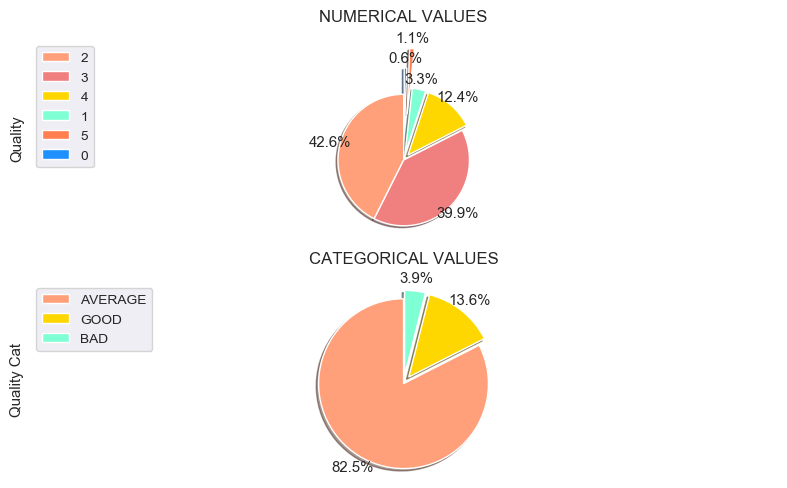

In [27]:

plt.subplot(211)                                     # Subplot position  

explode = (0.0, 0.0, 0.1, 0.1, 0.7, 0.4)             # Slice explode magnitude 
pie= data["Quality"].value_counts()                  # Data 

pie.plot(kind="pie", figsize=(10,5),                 # Type pie, figsize 
        explode=explode, autopct="%1.1f%%",          # Explode, percentage length
        startangle=90, shadow=True,                  # Orientation, shadow 
        labels=None, pctdistance=1.15,               # No labels, percentage distance
        colors = ["lightsalmon",                     # Slice colors 
                  "lightcoral",       
                  "gold", 
                  "aquamarine",
                  "coral", 
                  "dodgerblue"])

plt.title("NUMERICAL VALUES", y=1.05, size=12)       # Title
plt.axis("equal")                                    # Axis position

plt.legend(labels=pie.index, loc="upper left")       # labels, position

plt.subplot(212)

explode = (0.0, 0.1, 0.1) 
pie= data_class["Quality Cat"].value_counts()

pie.plot(kind="pie", figsize=(8,5), explode=explode, autopct="%1.1f%%", startangle=90, 
        shadow=True, labels=None, pctdistance=1.15, colors=["lightsalmon", "gold", "aquamarine"])

plt.title("CATEGORICAL VALUES", y=1.05, size=12)
plt.axis("equal")

plt.legend(labels=pie.index, loc="upper left")

plt.tight_layout()


plt.show()


<blockquote>
Perfect conversion.
</blockquote>

## 6. Model 1: Decision Tree

The model creation process requires splitting the dataset into **Test** and **Training sets** and using the training part of the data for training the classification model, and the rest for testing it.


In the **train_test_split**:
- The `test_size` is set at 33% of the dataset (33% for testing, 67% for training).
- The `random_state` is set at 324.

In the **decision tree classifier**:
- The `random state` (for splitting the nodes) is set at 0.
- The `max_leaf_nodes` (stopping criteria) is set at 11 as a result of the optimisation process outlined in the  section `Best value for max_leaf_nodes`.

In [28]:
X_features = ["Fixed Acidity", "Volatile Acidity", "Citric Acid",         # Features to create X
              "Residual Sugar", "Chlorides", "Sulfur Dioxide (Free)",     
              "Sulfur Dioxide (Total)", "Density", "PH", "Sulphates",
              "Alcohol"]

X = data_class[X_features].copy()  
y = data_class["Quality Cat"].copy()

In [29]:
# Double check that the shapes are compatible
# print(X.shape)
# print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)   # Data split

In [30]:
wine_classifier = DecisionTreeClassifier(max_leaf_nodes=11, random_state=0) # Create Decision Tree Object

wine_classifier.fit(X_train, y_train)                                       # Train it with our train set

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=11,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [31]:
predictions = wine_classifier.predict(X_test)    # form a prediction using our Test set

In [32]:
score_1 = accuracy_score(y_true=y_test, y_pred=predictions)  # Evaluate the accuracy

round(score_1, 3)

0.856

<blockquote>
An accuracy of 85.6% for model_1 is a good score.
</blockquote>

### Best value for max_leaf_nodes
The parameter max_leaf_nodes can affect the accuracy of our model. To find the bast value for this parameter I will:
- Test the accuracy of different models by increasing its value in a for loop.
- Store the accuracy results in a list.
- Convert the list into a Dataframe.
- Plot the Data frame to choose the value for max_leaf_nodes that return the best accuracy.

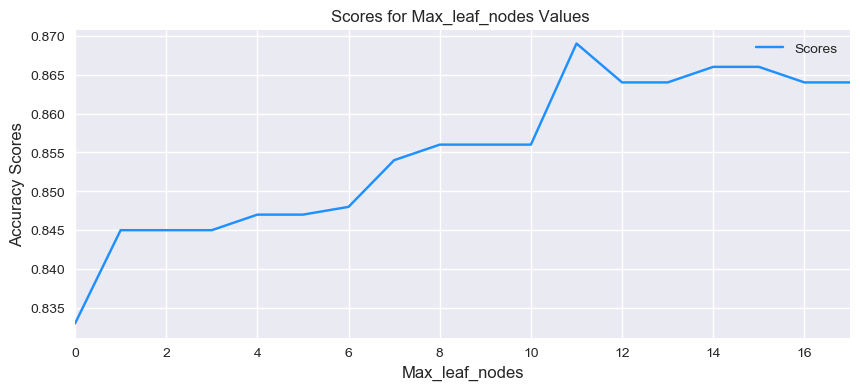

In [33]:
scores = []                                                                    # Create an empty list

for x in range(2,20):                                                          # Loop up to 20
    wine_classifier = DecisionTreeClassifier(max_leaf_nodes=x, random_state=0) # x increases at every loop 
    wine_classifier.fit(X_train, y_train)
    predictions = wine_classifier.predict(X_test)
    score = accuracy_score(y_true=y_test, y_pred=predictions)
    scores.append(round(score, 3))                                             # Append, empty list 

accuracy_scores = pd.DataFrame(data=scores, columns=["Scores"])                # Crete a new dataframe

mpl.style.use('seaborn')                                                       # Seaborn style

accuracy_scores.plot(kind="line", figsize=(10,4), color="dodgerblue")          # Plot thre results

plt.title('Scores for Max_leaf_nodes Values ', size=12)                        # Title
plt.ylabel('Accuracy Scores', size=12)                                         # Ylabel
plt.xlabel('Max_leaf_nodes', size=12)                                          # Xlabel


plt.show()

<blockquote>
The accuracy peaks for Max_leaf_nodes equal to 11, then it decreases.
</blockquote>

### Model Improvement
I will test 4 models removing the features indicated before and check if the accuracy improves.

### Model_2: Remove "Fixed Acidity"

In [34]:
X_features_2 = ["Volatile Acidity", "Citric Acid","Residual Sugar", "Chlorides", "Sulfur Dioxide (Free)", 
                "Sulfur Dioxide (Total)", "Density", "PH", "Sulphates", "Alcohol"]

X_2 = data_class[X_features_2].copy()
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.33, random_state=324)

wine_classifier_2 = DecisionTreeClassifier(max_leaf_nodes=11, random_state=0)
wine_classifier_2.fit(X_train_2, y_train_2)

predictions_2 = wine_classifier_2.predict(X_test_2)
score_2 = accuracy_score(y_true=y_test_2, y_pred=predictions_2)

### Model_3: Remove "Sulfur Dioxide (Total)"

In [35]:
X_features_3 = ["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar", "Chlorides", 
                "Sulfur Dioxide (Free)", "Density", "PH", "Sulphates", "Alcohol"]

X_3 = data_class[X_features_3].copy()
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, test_size=0.33, random_state=324)

wine_classifier_3 = DecisionTreeClassifier(max_leaf_nodes=11, random_state=0)
wine_classifier_3.fit(X_train_3, y_train_3)

predictions_3 = wine_classifier_3.predict(X_test_3)
score_3 = accuracy_score(y_true=y_test_3, y_pred=predictions_3)

### Model_4: Remove "Citric Acid"

In [36]:
X_features_4 = ["Fixed Acidity", "Volatile Acidity","Residual Sugar", "Chlorides", "Sulfur Dioxide (Free)",
                "Sulfur Dioxide (Total)", "Density", "PH", "Sulphates", "Alcohol"]

X_4 = data_class[X_features_4].copy()
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y, test_size=0.33, random_state=324)

wine_classifier_4 = DecisionTreeClassifier(max_leaf_nodes=11, random_state=0)
wine_classifier_4.fit(X_train_4, y_train_4)

predictions_4 = wine_classifier_4.predict(X_test_4)
score_4 = accuracy_score(y_true=y_test_4, y_pred=predictions_4)

### Model_5: Remove "Fixed Acidity", "Sulfur Dioxide (Total), Citric Acid"

In [37]:
X_features_5 = ["Volatile Acidity","Residual Sugar", "Chlorides", "Sulfur Dioxide (Free)", "Density", "PH",
                "Sulphates","Alcohol"]

X_5 = data_class[X_features_5].copy()
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y, test_size=0.33, random_state=324)

wine_classifier_5 = DecisionTreeClassifier(max_leaf_nodes=11, random_state=0)
wine_classifier_5.fit(X_train_5, y_train_5)

predictions_5 = wine_classifier_5.predict(X_test_5)
score_5 = accuracy_score(y_true=y_test_5, y_pred=predictions_5)

In [38]:
print("Accuracy Model a: ", round(score_1, 3))
print("Accuracy Model b: ", round(score_2, 3))
print("Accuracy Model c: ", round(score_3, 3))
print("Accuracy Model d: ", round(score_4, 3))
print("Accuracy Model e: ", round(score_5, 3))

Accuracy Model a:  0.856
Accuracy Model b:  0.856
Accuracy Model c:  0.862
Accuracy Model d:  0.856
Accuracy Model e:  0.856


<blockquote>
    
As expected, very similar results. Model c shows a small improvement (when the feature Sulfur Dioxide (Total) is removed).
This is our best classification model using a decision tree classifier. Accuracy: 86.2%

</blockquote>

## 7. Model 2: K-Nearest Neighbours
Here we will test a different algorithm: K-Nearest Neighbours. This algorithm is based on distance of cases and data standardisation is recommended.

In [39]:
X_features = ["Fixed Acidity", "Volatile Acidity", "Citric Acid",         # The features to create X
              "Residual Sugar", "Chlorides", "Sulfur Dioxide (Free)",   
              "Sulfur Dioxide (Total)", "Density", "PH", "Sulphates",
              "Alcohol"]

X_N = data_class[X_features].copy()  
y = data_class["Quality Cat"].copy()

In [40]:
# We Scale our numerical data and fit/transform it using X
X_N = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(X, y, test_size=0.33, random_state=324) # Data split

### K Value
The value of K is equal to the number of nearest points to the data that has to be predicted. It can impact the quality of our model. The value of K is set at 1 as a result of the optimisation process outlined in the section `K Optimisation Process`.

In [41]:
k = 1                                                                                   # Best value for k 
neighbour = KNeighborsClassifier(n_neighbors=k)                                       # Classifier Object
neighbour.fit(X_train_N,y_train_N)                                                      # Fit with Train set

prediction_k = neighbour.predict(X_test_N)                                              # Form a prediction
score_k = accuracy_score(y_true=y_test_4, y_pred=prediction_k)                      # Accuracy

print("K Nearest Neighbours Model Accuracy: ", round(score_k, 3))

K Nearest Neighbours Model Accuracy:  0.843


<blockquote>
    
84.3 % is a good result, but the model is less accurate than the best Decision Tree Model.

</blockquote>

### K Optimisation Process
This is the same process used to find the `best value for max_leaf_nodes`.

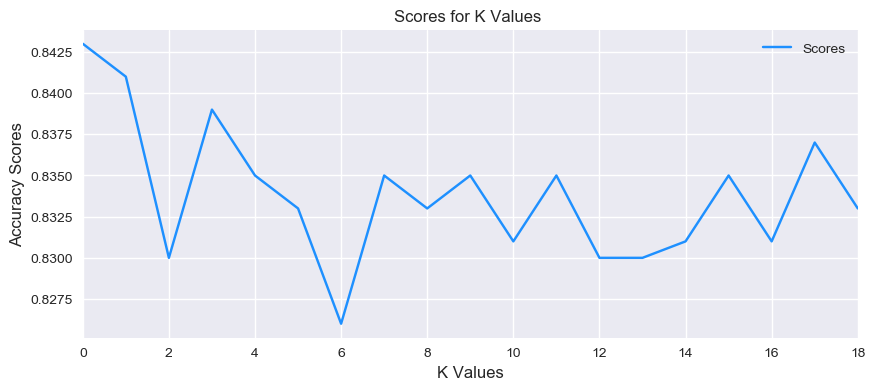

In [42]:
scores = []                                                                    # Create an empty list

for x in range(1,20):                                                          # Loop up to 20
    neighbour = KNeighborsClassifier(n_neighbors=x)
    neighbour.fit(X_train_N,y_train_N) # x increases at every loop 
    predictions_k=neighbour.predict(X_test_N)
    score = accuracy_score(y_true = y_test, y_pred = predictions_k)
    scores.append(round(score, 3))                                             # Append, empty list 
accuracy_scores = pd.DataFrame(data=scores, columns = ["Scores"])              # Crete a new dataframe

mpl.style.use('seaborn')                                                       # Seaborn style

accuracy_scores.plot(kind="line", figsize=(10,4), color="dodgerblue")          # Plot thre results

plt.title('Scores for K Values ', size=12)                                     # Title
plt.ylabel('Accuracy Scores', size=12)                                         # Ylabel
plt.xlabel('K Values', size=12)                                                # Xlabel


plt.show()

<blockquote>
K peaks at 1, then it drops.
</blockquote>
Model performances can be visually compared in the final plot.

In [43]:

accs = {'Values':[0.856, 0.856, 0.862, 0.856, 0.856, 0.843]}                  # Dictionary, accuracy results

models = pd.DataFrame(accs, columns=["Values"],
                      index=["Decision Tree - Model a",                        # Turn it into a DataFrame
                             "Decision Tree - Model b",
                             "Decision Tree - Model c",
                             "Decision Tree - Model d",
                             "Decision Tree - Model e",
                             "K Nearest Neighbours"])

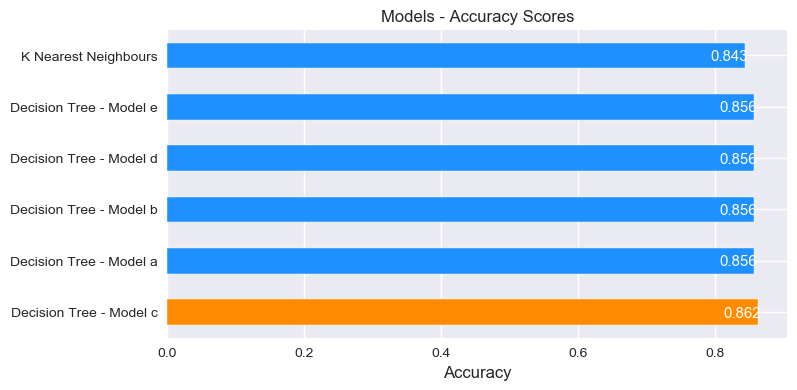

In [44]:

models.sort_values(["Values"], ascending=False, axis=0, inplace=True)         # Sort values, descending order                     

compare = models["Values"]                                                    # Pd.Series, format for plotting

compare.plot(kind='barh', figsize=(8, 4),          # Barh plot, size
             color=['darkorange',                  # Individual bar colors 
                    'dodgerblue',
                    'dodgerblue',
                    'dodgerblue',
                    'dodgerblue',
                    'dodgerblue'])      

plt.xlabel('Accuracy', size=12)                                               # Xlabel
plt.title('Models - Accuracy Scores', size=12)                                # Title

for index, value in enumerate(compare):                                       # Enumerate returns Index, values
    label = format(value)                                                     # Format the labels
    plt.annotate(label,                                                       # Annnotate: text to display
                 xy=(value - 0.05,                                            # Label positioning, x-axis
                     index - 0.10),                                           # Y-axis 
                 color="white")  # Label color
    
plt.show()



## 8. Conclusions

The best performing model was the `Decision Tree Classifier` where the feature `Sulfur Dioxide (Total) was removed`. However, as predicted, removing features from our dataframe only increased/decreased the model performance minimally.

Optimising the parameters `Max_Leaf_Nodes` for the Decision Tree Classifier and `K` for the KNN Classifier had a positive impact on the model's accuracies, as shown in the related charts.

Co-dependencies amongst features were found during the exploratory analysis phase. Reducing the number of features in relation to these co-dependencies had a minimal positive impact on model accuracy. This is probably due to the limited number of features (11) as well as to the fact that the feature importance score had a very limited range (it goes from a minimum value of 0.075 to a maximum value of 0.155).

The final model for wine predictions will allow me to choose the red variant of the Portuguese "Vinho Verde" wine with an accuracy of app. 86%. In fact, the model results refers to this wine variant. Different wine variety could behave in a different way, and they will require the creation of a new model using a bigger dataset.

Other algorithms are available for classification problems: Naive Bayes, Support Vector Machine, and Logistic regression. In this project I employed Decision Trees and K Nearest Neighbours algorithms because they are the models learnt on this course. Future research will include other algorithms to check if they perform better in this situation.

A better dataset should include grape types and wine brand, to make it easier researching wine online and choosing the grape variety that we like the most.